#Churn Prediction Model Comparison

##Data Collection and Pre-processing

In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
df =  pd.read_csv("/content/Churn_Modelling.csv")

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [44]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
df.shape

(10000, 14)

In [47]:
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [48]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_geography = LabelEncoder()

In [49]:
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Geography'] = le_geography.fit_transform(df['Geography'])

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [51]:
#To find correlation btw columns
df_dummy = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis = 1)
df_dummy.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

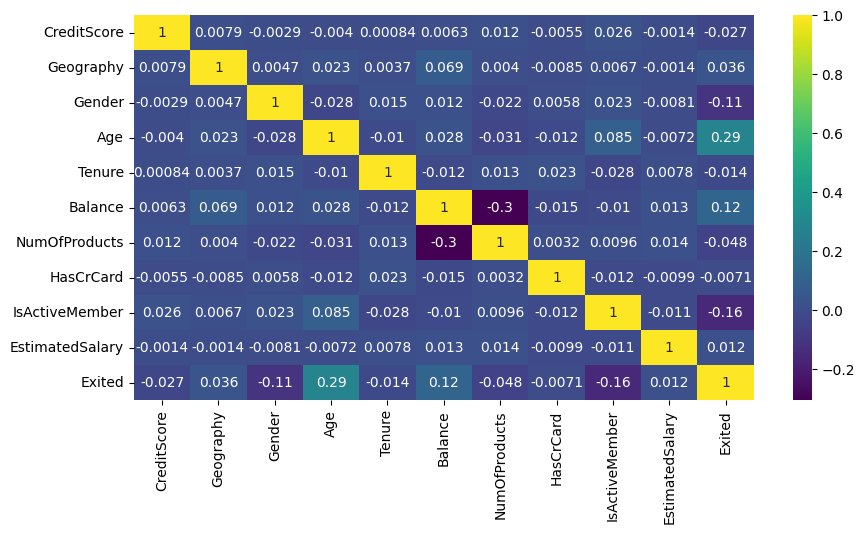

In [53]:
corr_matrix=df_dummy.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix,cmap='viridis',annot=True)

With the result of correlation analysis, unnecessary columns can be removed

In [54]:
df = df.drop(['RowNumber','CustomerId','Surname', 'HasCrCard'], axis = 1)

In [55]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

##Data Splitting

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [57]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
log_accuracy = round(accuracy_score(y_test, y_pred), 3)
log_precision = round(precision_score(y_test, y_pred), 3)
log_recall = round(recall_score(y_test, y_pred), 3)
log_f1 = round(f1_score(y_test, y_pred), 3)

print("Accuracy:", log_accuracy)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1 Score:", log_f1)

Accuracy: 0.641
Precision: 0.307
Recall: 0.668
F1 Score: 0.42


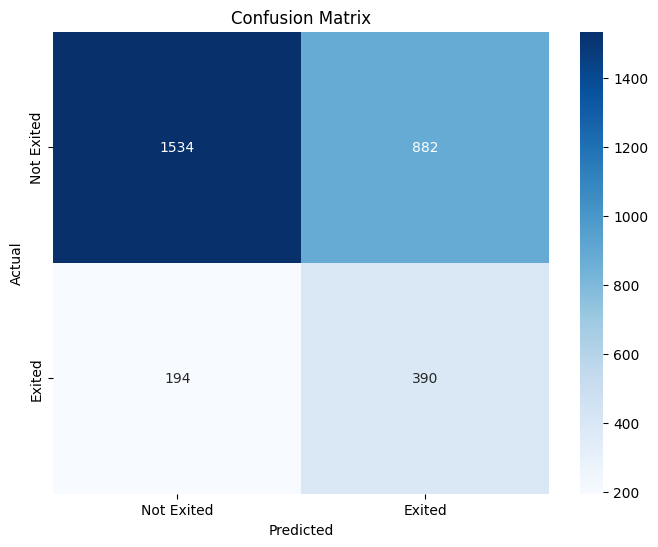

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report

# Evaluate on training data
y_train_pred = lr.predict(X_train)
print("Training Data Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate on test data
y_test_pred = lr.predict(X_test)
print("Test Data Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      5547
           1       0.67      0.68      0.67      5547

    accuracy                           0.67     11094
   macro avg       0.67      0.67      0.67     11094
weighted avg       0.67      0.67      0.67     11094

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      2416
           1       0.31      0.67      0.42       584

    accuracy                           0.64      3000
   macro avg       0.60      0.65      0.58      3000
weighted avg       0.77      0.64      0.68      3000



##Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [ ]:
rf_accuracy = round(accuracy_score(y_test, y_pred), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)
rf_f1 = round(f1_score(y_test, y_pred), 3)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Accuracy: 0.817
Precision: 0.524
Recall: 0.654
F1 Score: 0.582


In [29]:
# Evaluate the model
from sklearn.metrics import classification_report

# Evaluate on training data
y_train_pred = rf_classifier.predict(X_train)
print("Training Data Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate on test data
y_test_pred = rf_classifier.predict(X_test)
print("Test Data Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5547
           1       1.00      1.00      1.00      5547

    accuracy                           1.00     11094
   macro avg       1.00      1.00      1.00     11094
weighted avg       1.00      1.00      1.00     11094

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2416
           1       0.52      0.65      0.58       584

    accuracy                           0.82      3000
   macro avg       0.72      0.76      0.73      3000
weighted avg       0.84      0.82      0.82      3000



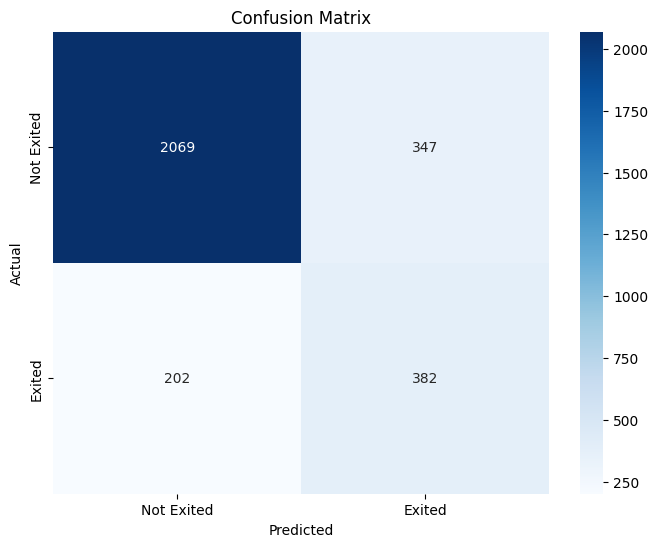

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##XGBoost

In [59]:
import xgboost as xgb

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred = model.predict(X_test)

In [61]:
xgb_accuracy = round(accuracy_score(y_test, y_pred), 3)
xgb_precision = round(precision_score(y_test, y_pred), 3)
xgb_recall = round(recall_score(y_test, y_pred), 3)
xgb_f1 = round(f1_score(y_test, y_pred), 3)

print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

Accuracy: 0.819
Precision: 0.529
Recall: 0.642
F1 Score: 0.58


In [62]:
# Evaluate the model
from sklearn.metrics import classification_report

# Evaluate on training data
y_train_pred = model.predict(X_train)
print("Training Data Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate on test data
y_test_pred = model.predict(X_test)
print("Test Data Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5547
           1       0.95      0.95      0.95      5547

    accuracy                           0.95     11094
   macro avg       0.95      0.95      0.95     11094
weighted avg       0.95      0.95      0.95     11094

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2416
           1       0.53      0.64      0.58       584

    accuracy                           0.82      3000
   macro avg       0.72      0.75      0.73      3000
weighted avg       0.83      0.82      0.83      3000



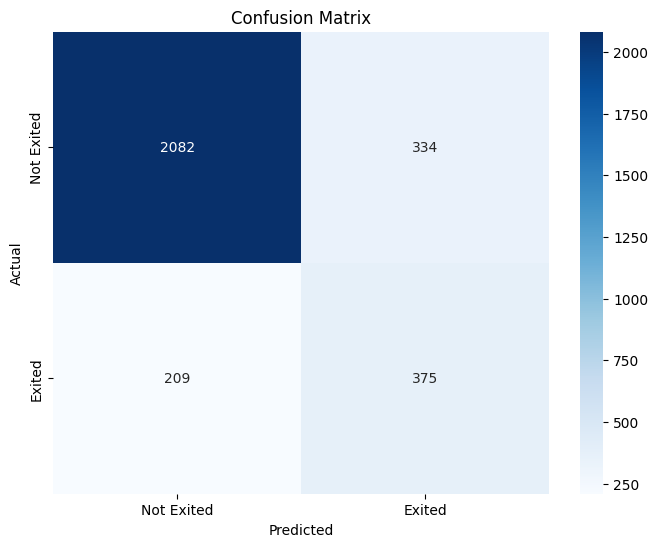

In [63]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

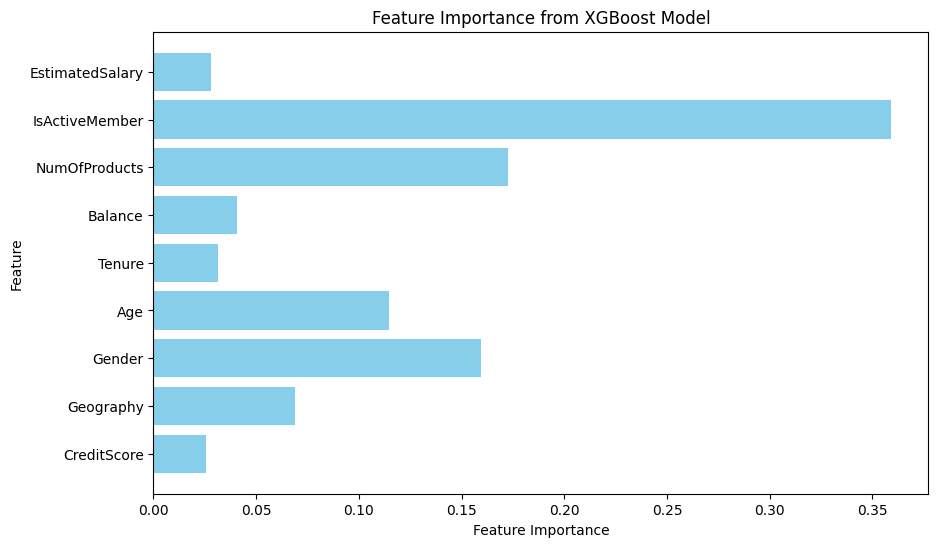

In [64]:
# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Calculate feature importance
feature_importance = model.feature_importances_

# Get feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost Model')
plt.show()

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Model training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Model evaluation
y_pred = knn.predict(X_test)

In [ ]:
knn_accuracy = round(accuracy_score(y_test, y_pred), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)
knn_f1 = round(f1_score(y_test, y_pred), 3)

print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

Accuracy: 0.572
Precision: 0.203
Recall: 0.409
F1 Score: 0.271


In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report

# Evaluate on training data
y_train_pred = knn.predict(X_train)
print("Training Data Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate on test data
y_test_pred = knn.predict(X_test)
print("Test Data Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      5547
           1       0.76      0.87      0.81      5547

    accuracy                           0.79     11094
   macro avg       0.80      0.79      0.79     11094
weighted avg       0.80      0.79      0.79     11094

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      2416
           1       0.20      0.41      0.27       584

    accuracy                           0.57      3000
   macro avg       0.51      0.51      0.48      3000
weighted avg       0.69      0.57      0.61      3000



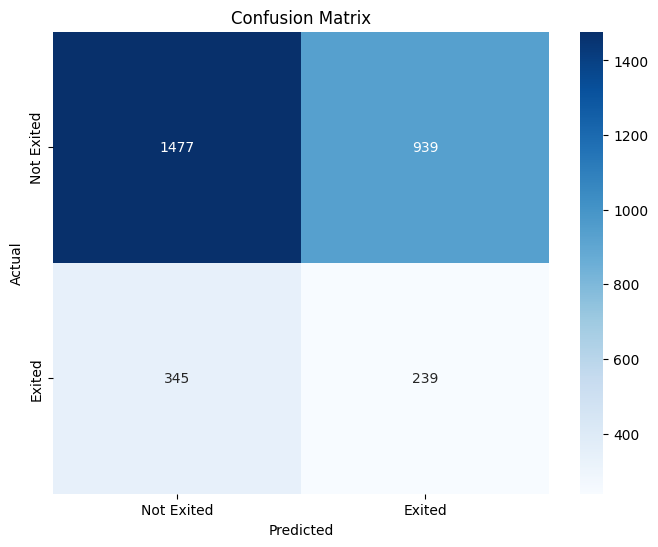

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Model training
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Model evaluation
y_pred = nb.predict(X_test)

In [ ]:
nb_accuracy = round(accuracy_score(y_test, y_pred), 3)
nb_precision = round(precision_score(y_test, y_pred), 3)
nb_recall = round(recall_score(y_test, y_pred), 3)
nb_f1 = round(f1_score(y_test, y_pred), 3)

print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)

Accuracy: 0.667
Precision: 0.335
Recall: 0.721
F1 Score: 0.457


In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report

# Evaluate on training data
y_train_pred = model.predict(X_train)
print("Training Data Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate on test data
y_test_pred = model.predict(X_test)
print("Test Data Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      5547
           1       0.70      0.78      0.74      5547

    accuracy                           0.72     11094
   macro avg       0.72      0.72      0.72     11094
weighted avg       0.72      0.72      0.72     11094

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      2416
           1       0.33      0.72      0.46       584

    accuracy                           0.67      3000
   macro avg       0.62      0.69      0.61      3000
weighted avg       0.80      0.67      0.70      3000



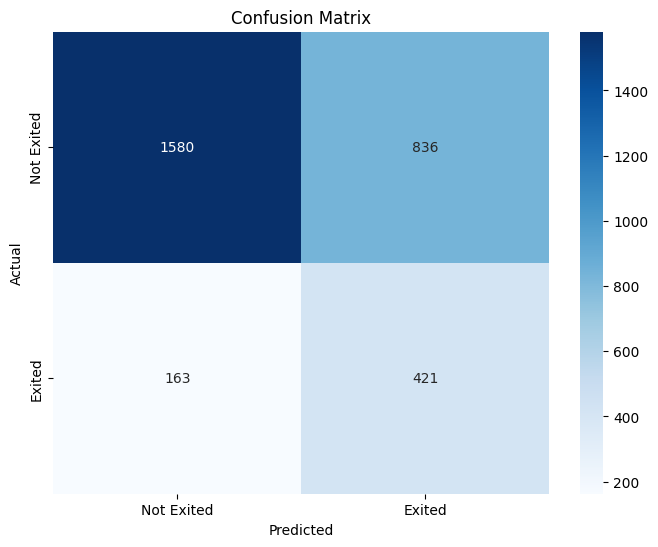

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Model Comparison

In [ ]:
print("Logistic Regression: ", log_accuracy)
print("Random Forest: ", rf_accuracy)
print("XGBoost: ", xgb_accuracy)
print("Knn: ", knn_accuracy)
print("Naive Bayes: ", nb_accuracy)

Logistic Regression:  0.641
Random Forest:  0.817
XGBoost:  0.819
Knn:  0.572
Naive Bayes:  0.667


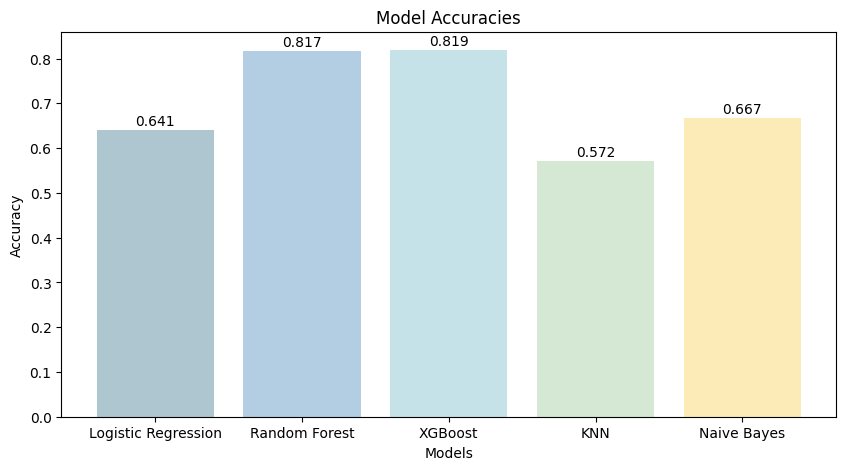

In [ ]:
model_accuracies = {
    "Logistic Regression": log_accuracy,
    "Random Forest": rf_accuracy,
    "XGBoost": xgb_accuracy,
    "KNN": knn_accuracy,
    "Naive Bayes": nb_accuracy
}

models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['#aec6cf', '#b3cde3', '#c6e2e9', '#d5e8d4', '#fcebb6'])

plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f"{accuracies[i]:.3f}", ha='center')

plt.show()

In [ ]:
print("Logistic Regression: ", log_precision)
print("Random Forest: ", rf_precision)
print("XGBoost: ", xgb_precision)
print("Knn: ", knn_precision)
print("Naive Bayes: ", nb_precision)

Logistic Regression:  0.307
Random Forest:  0.524
XGBoost:  0.529
Knn:  0.203
Naive Bayes:  0.335


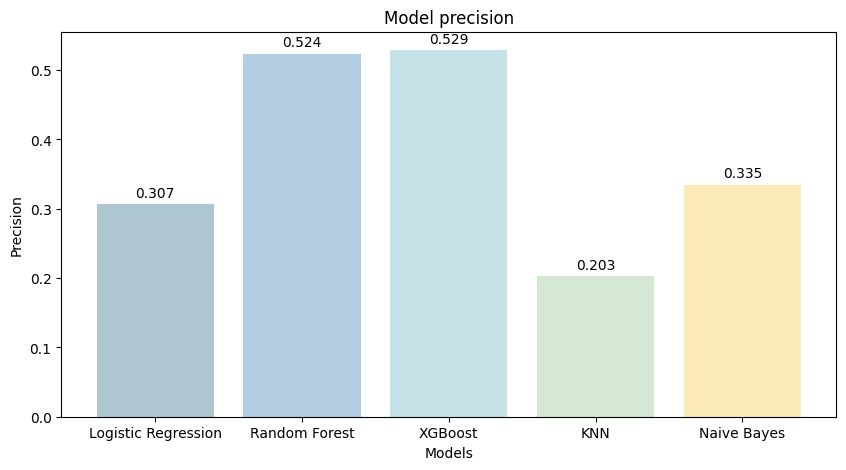

In [ ]:
model_precision = {
    "Logistic Regression": log_precision,
    "Random Forest": rf_precision,
    "XGBoost": xgb_precision,
    "KNN": knn_precision,
    "Naive Bayes": nb_precision
}

models = list(model_precision.keys())
precision = list(model_precision.values())

plt.figure(figsize=(10, 5))
plt.bar(models, precision, color=['#aec6cf', '#b3cde3', '#c6e2e9', '#d5e8d4', '#fcebb6'])

plt.title('Model precision')
plt.xlabel('Models')
plt.ylabel('Precision')

for i in range(len(models)):
    plt.text(i, precision[i] + 0.01, f"{precision[i]:.3f}", ha='center')

plt.show()

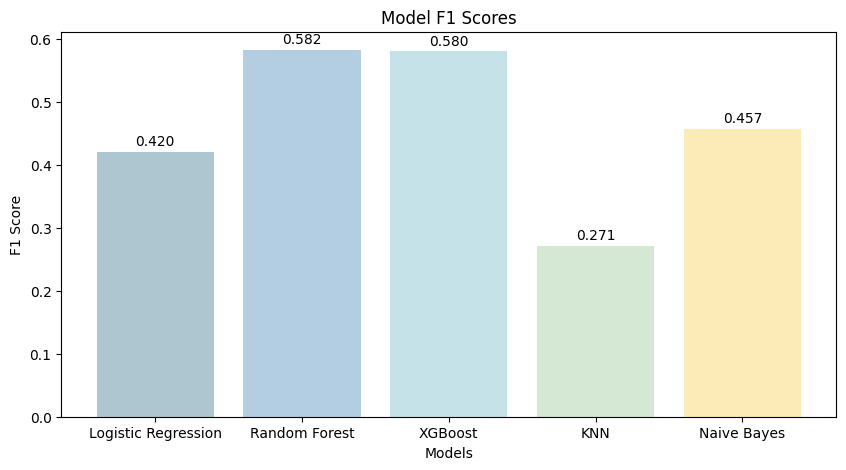

In [ ]:
# Define F1 scores for each model
model_f1 = {
    "Logistic Regression": log_f1,
    "Random Forest": rf_f1,
    "XGBoost": xgb_f1,
    "KNN": knn_f1,
    "Naive Bayes": nb_f1
}

# Extract model names and F1 scores
models = list(model_f1.keys())
f1_scores = list(model_f1.values())

# Create a bar chart for F1 scores
plt.figure(figsize=(10, 5))
plt.bar(models, f1_scores, color=['#aec6cf', '#b3cde3', '#c6e2e9', '#d5e8d4', '#fcebb6'])

plt.title('Model F1 Scores')
plt.xlabel('Models')
plt.ylabel('F1 Score')

# Add the F1 score values above each bar
for i in range(len(models)):
    plt.text(i, f1_scores[i] + 0.01, f"{f1_scores[i]:.3f}", ha='center')

plt.show()


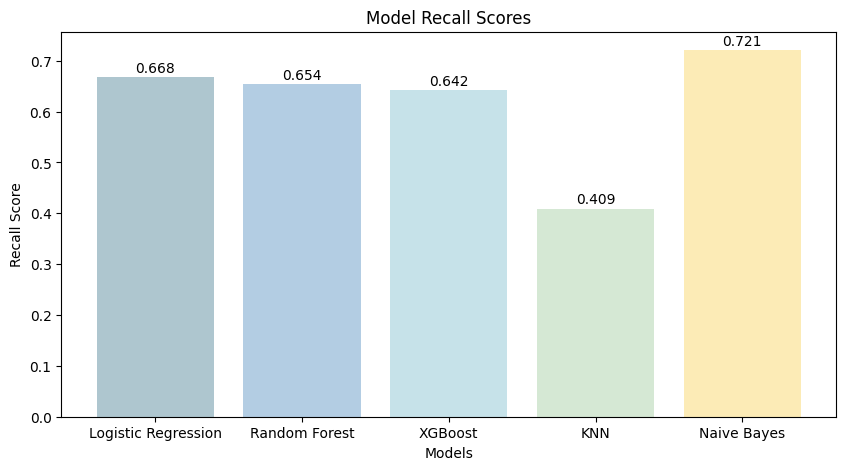

In [ ]:
# Define recall scores for each model
model_recall = {
    "Logistic Regression": log_recall,
    "Random Forest": rf_recall,
    "XGBoost": xgb_recall,
    "KNN": knn_recall,
    "Naive Bayes": nb_recall
}

# Extract model names and recall scores
models = list(model_recall.keys())
recall_scores = list(model_recall.values())

# Create a bar chart for recall scores
plt.figure(figsize=(10, 5))
plt.bar(models, recall_scores, color=['#aec6cf', '#b3cde3', '#c6e2e9', '#d5e8d4', '#fcebb6'])

plt.title('Model Recall Scores')
plt.xlabel('Models')
plt.ylabel('Recall Score')

# Add the recall score values above each bar
for i in range(len(models)):
    plt.text(i, recall_scores[i] + 0.01, f"{recall_scores[i]:.3f}", ha='center')

plt.show()


##Feature Importance

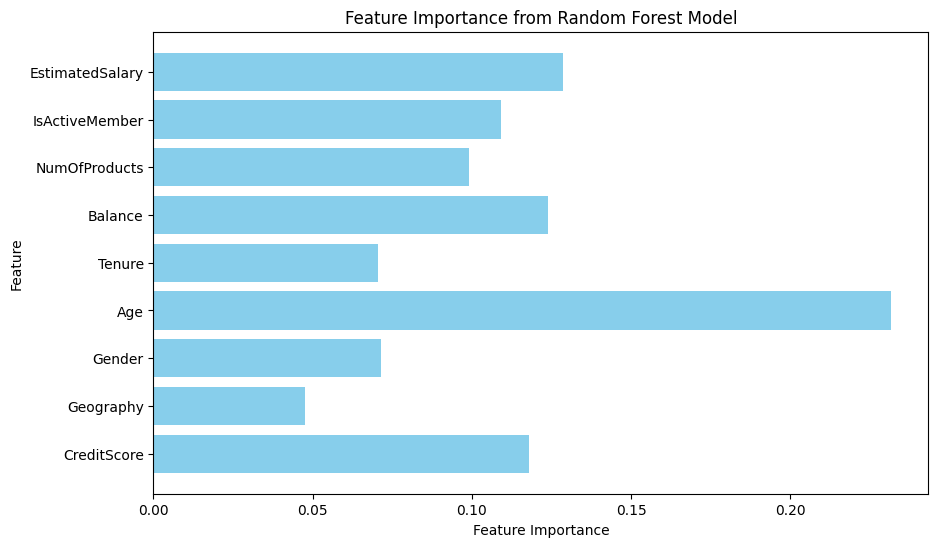

In [65]:
# Calculate feature importance
feature_importance = rf_classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.show()

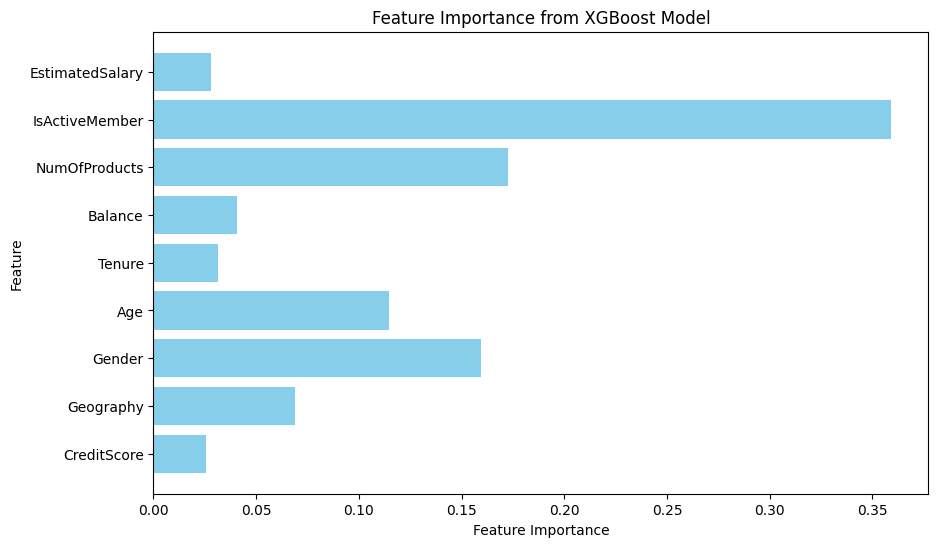

In [66]:
# Calculate feature importance
feature_importance = model.feature_importances_

# Get feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost Model')
plt.show()